# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data/states_edu.csv")
df.head()
df.shape


(1715, 25)

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'G4num',
    'GRADES_8_G':'G8num',
    'GRADES_12_G':'G12num',
    'GRADES_1_8_G':'PRIMnum',
    'GRADES_9_12_G':'HSnum',
    'GRADES_ALL_G':'Allnum',
    'AVG_MATH_4_SCORE':'Math4score', 'AVG_MATH_8_SCORE':'Math8score',
       'AVG_READING_4_SCORE':'Reading4score', 'AVG_READING_8_SCORE':'Reading8score',
    'ENROLL':"TTnum"
    
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [5]:
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Since we have data for both reading and math scores for both 4th and 8th grades, we can calculate the average and compare them.
From the following calculation, Ohio has higher average outcome score across all years. 

In [6]:
df_new = df.dropna(subset=['Reading4score','Math4score','G4num','Reading8score','Math8score','G8num']).copy()
df_new['Average']  = ((df_new['Reading4score']+df_new['Math4score'])*df_new['G4num']+(df_new['Reading8score']+df_new['Math8score'])*df_new['G8num'])/(df_new['G4num']+df_new['G8num'])
# df_new['Average'] = ((df_new.groupby('STATE')['Reading4score'].sum()+df_new.groupby('STATE')['Math4score'].sum())*df_new.groupby('STATE')['G4num'].sum()+（df_new.groupby('STATE')['Reading8score'].sum()+df_new.groupby('STATE')['Math8score'].sum())*df_new.groupby('STATE')['G8num'].sum())/(df_new.groupby('STATE')['G4num'].sum()+df_new.groupby('STATE')['G8num'].sum())

# df_new.groupby('STATE')['Average'].mean()['MICHIGAN']>df_new.groupby('STATE')['Average'].mean()['OHIO']
print(df_new.groupby('STATE')['Average'].mean()['MICHIGAN'],df_new.groupby('STATE')['Average'].mean()['OHIO'])
df_new.groupby('STATE')['Average'].mean()['MICHIGAN']>df_new.groupby('STATE')['Average'].mean()['OHIO']

499.3923275854918 511.43945259201047


False

Find the average for your outcome score across all states in 2019

Some values are missing for year 2019. Use original data. If discarding all unknown values, 2019 has no value left. It is hard to calculate. After looking at the data, I find that in 2019, there is no enrollment data. I can only change defination of average into a nonsense value, namely the average of average score.

In [7]:
# df.groupby('YEAR')['Average'].mean()
df['Average']  = ((df['Reading4score']+df['Math4score'])*df['G4num']+(df['Reading8score']+df['Math8score'])*df['G8num'])/(df['G4num']+df['G8num'])
average_2019 = df[df['YEAR'] == 2019]['Average'].mean()
# print(average_2019)
# print(df.groupby("YEAR")['Average'].mean())
df['Average']  = (df['Reading4score']+df['Math4score']+df['Reading8score']+df['Math8score'])/4
average_2019 = df[df['YEAR'] == 2019]['Average'].mean()
print(average_2019)
# print(df.groupby("YEAR")['Average'].mean())

250.89150943396226


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

Still using average of average

In [8]:
df.groupby("STATE")['Average'].max()

STATE
ALABAMA                 244.50
ALASKA                  248.25
ARIZONA                 249.75
ARKANSAS                249.75
CALIFORNIA              246.75
COLORADO                258.75
CONNECTICUT             258.75
DELAWARE                254.25
DISTRICT_OF_COLUMBIA    242.00
DODEA                   264.25
FLORIDA                 255.00
GEORGIA                 251.50
HAWAII                  249.75
IDAHO                   254.25
ILLINOIS                252.50
INDIANA                 258.25
IOWA                    256.00
KANSAS                  257.50
KENTUCKY                254.25
LOUISIANA               243.25
MAINE                   257.25
MARYLAND                259.50
MASSACHUSETTS           266.00
MICHIGAN                250.00
MINNESOTA               261.50
MISSISSIPPI             247.50
MISSOURI                254.50
MONTANA                 258.75
NATIONAL                254.25
NEBRASKA                256.75
NEVADA                  247.50
NEW_HAMPSHIRE           263.75
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
df['TTnum'] = df["TTnum"].fillna(df['Allnum'])
df["TOTAL_EXPENDITURE"] = df["TOTAL_EXPENDITURE"].fillna(df['INSTRUCTION_EXPENDITURE']+df['SUPPORT_SERVICES_EXPENDITURE']+ df['OTHER_EXPENDITURE']+ df['CAPITAL_OUTLAY_EXPENDITURE'])
df.dropna(subset=["TOTAL_EXPENDITURE","TTnum"],inplace = True)
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE']/df['TTnum']
print(df['expenditure_per_student'])

0        3.627221
1        7.939520
2        5.050774
3        3.948044
4        5.164536
          ...    
1270    12.853611
1271    14.071657
1272    12.164031
1273    13.742614
1274    21.523727
Name: expenditure_per_student, Length: 1275, dtype: float64


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

Use some values from Grades_all to fill in the missing values of ENROLL because ENROLL is the U.S. Census Bureau's count for students in the state and should be comparable to GRADES_ALL, which is the 
NCES's estimate for students in the stat. The same for total_expenditure, and then throw all missing lines. .

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

My chosen response is grade 8 math score.

**Visualization 1**

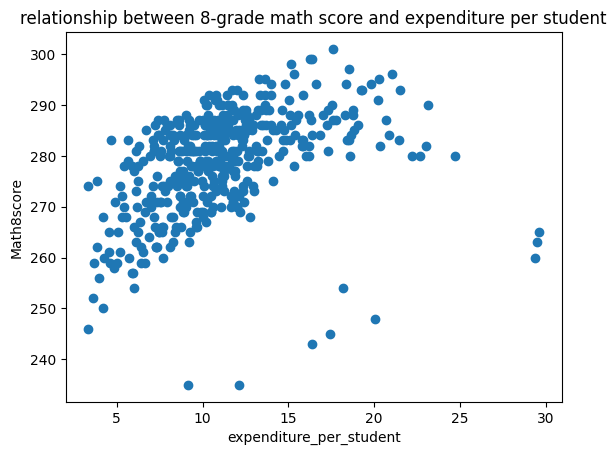

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['expenditure_per_student'],df['Math8score'])
plt.title("relationship between 8-grade math score and expenditure per student")
plt.xlabel("expenditure_per_student")
plt.ylabel('Math8score')
plt.show()

**<relationship between 8-grade math score and expenditure per student>**

**Visualization 2**

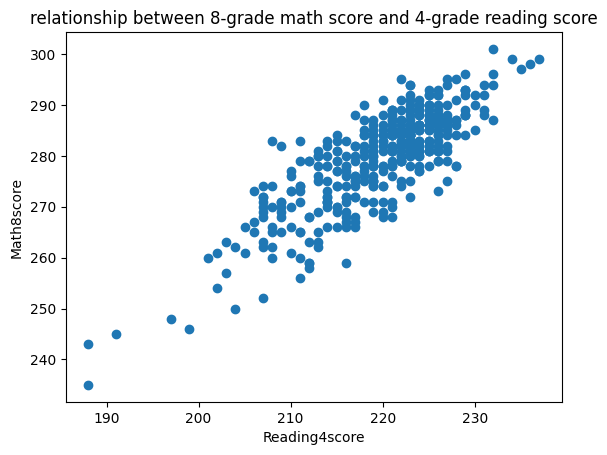

In [38]:
plt.scatter(df['Reading4score'],df['Math8score'])
plt.title("relationship between 8-grade math score and 4-grade reading score")
plt.xlabel("Reading4score")
plt.ylabel('Math8score')
plt.show()

**<relationship between 8-grade math score and 4-grade reading score>**

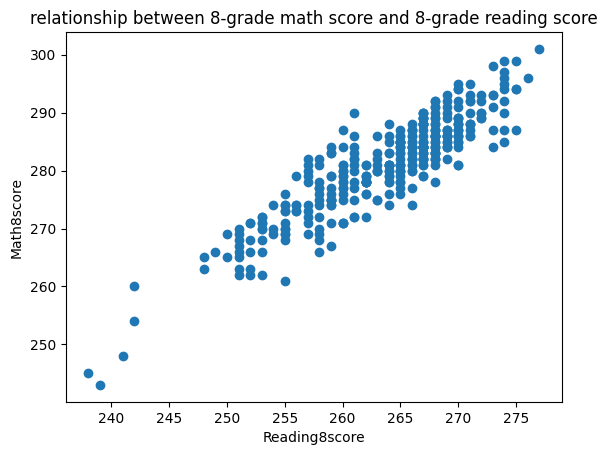

In [39]:
plt.scatter(df['Reading8score'],df['Math8score'])
plt.title("relationship between 8-grade math score and 8-grade reading score")
plt.xlabel("Reading8score")
plt.ylabel('Math8score')
plt.show()

**<relationship between 8-grade math score and 8-grade reading score>**

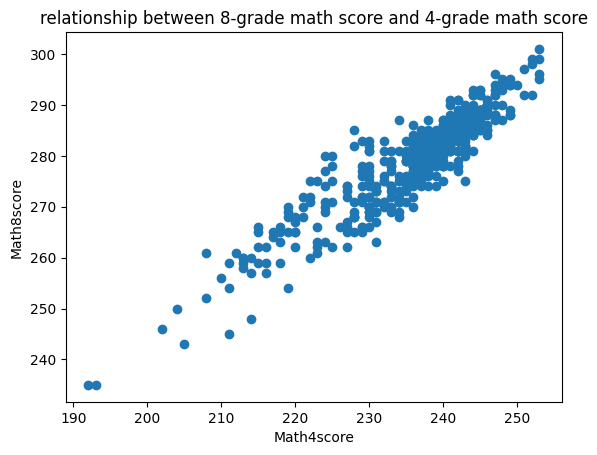

In [40]:
plt.scatter(df['Math4score'],df['Math8score'])
plt.title("relationship between 8-grade math score and 4-grade math score")
plt.xlabel("Math4score")
plt.ylabel('Math8score')
plt.show()

**<relationship between 8-grade math score and 4-grade math score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [41]:
# X =
# y = 
X = df[['Reading4score','expenditure_per_student','Reading8score','Math4score']].dropna()
y = df.loc[X.index]['Math8score']
y.fillna(y.median(), inplace=True)

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [24]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [43]:
# create your model here
# model = 
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [46]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

-45.09833112847667
[-0.38248359  0.01845292  0.73807281  0.90226908]


0.934160757575126

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

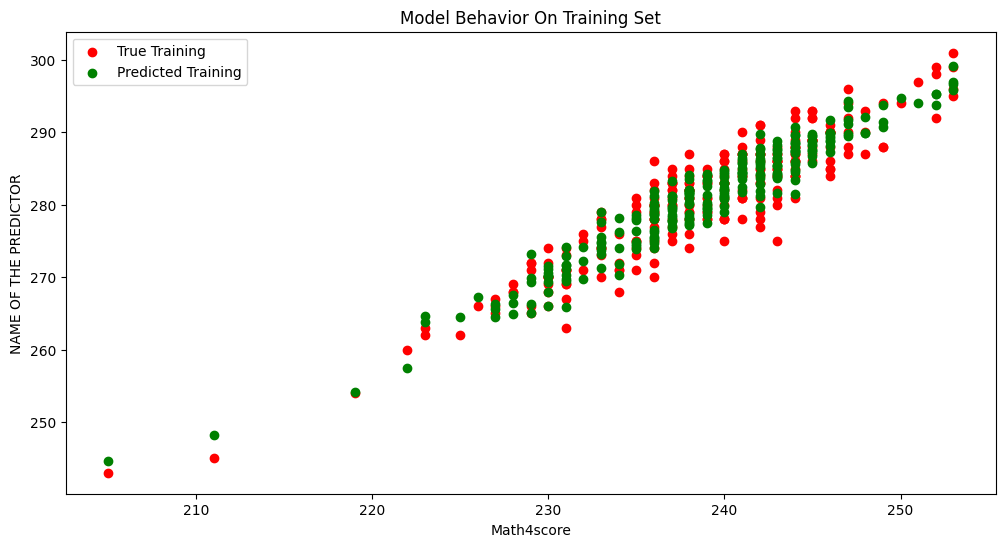

In [48]:
col_name = 'Math4score'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

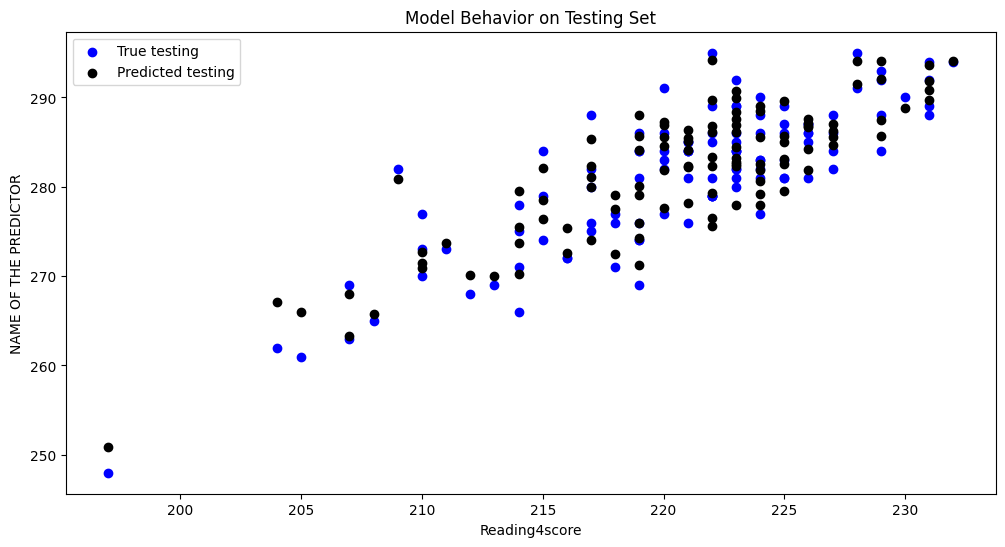

In [50]:
col_name = "Reading4score"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

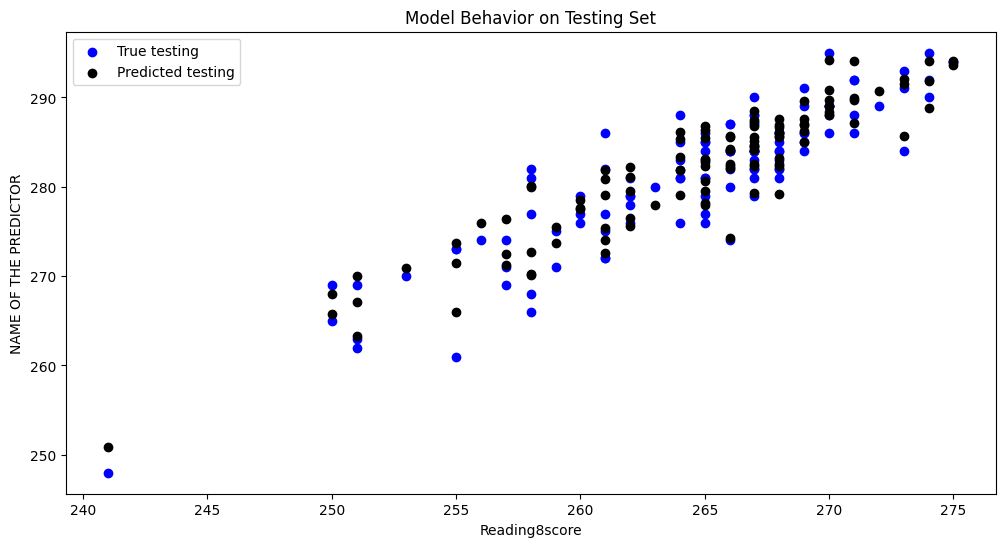

In [51]:
col_name = "Reading8score"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

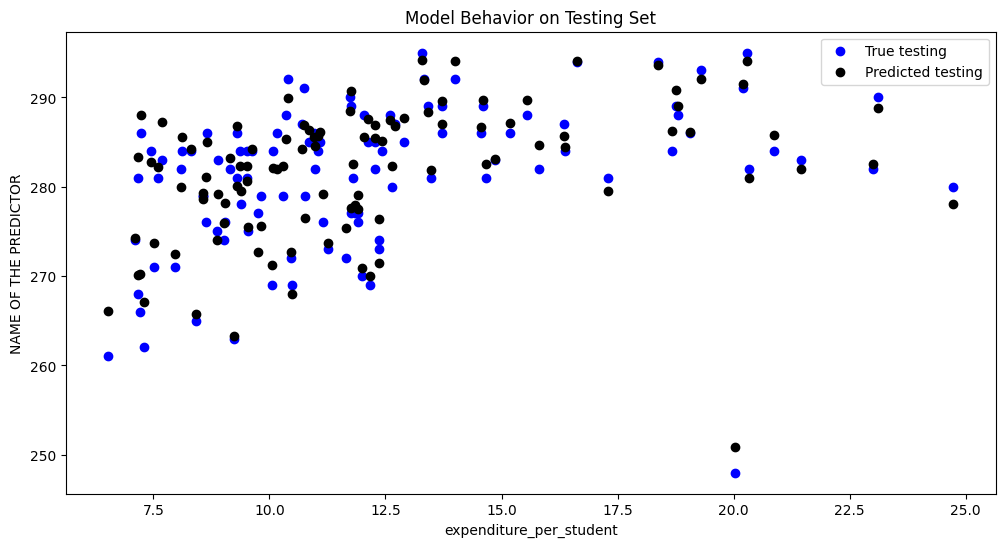

In [47]:
col_name = "expenditure_per_student"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In this model, I have used 4 predictors: math score for 4th grade, reading score for 4th grade, reading score for the 8th grade and the expenditure per student to predict the score for 8th grade students. The model is based on the finding in the previous visualization part that there is probably some linear relationship between the response and the 4 predictors. The $R^2$ value for the model is 0.93, which indicates the model has done a good job in predicting the response with the 4 predictors. 

Generally, inscreasing the expenditure per student can help increase the students' scores.